# Definition of the Problems
"""To measure Investor confidence and related investor attitudes"""

# Success Measurement

In [ ]:

""""""

# Data Collection

In [25]:
import pandas as pd
import numpy as np

# Data Validation
data validation is the process of ensuring data has undergone data cleansing to ensure they have data quality, 
that is, that they are both correct and useful. It uses routines, often called "validation rules", "validation 
constraints", or "check routines", that check for correctness, meaningfulness, and security of data that are input 
to the system.

In [27]:

def read_file():
    df = pd.read_csv(file_name)
    if (df.empty):
        print('CSV file is empty')
    else:
        print('CSV file is not empty')
        return df

In [29]:
file_name = r'C:\Users\miki\Desktop\GitHub\Simple-Linear-Regression\Simple-Linear-Regression\MySLR\YALE-US_CONF_INDEX.csv'
df = read_file()

CSV file is not empty


In [30]:
# to know about the data types we will do 
df = pd.read_csv('YALE-US_CONF_INDEX.csv')
for dtype in df.dtypes.iteritems():
    print(dtype)

('Date', dtype('O'))
('Index Value', dtype('float64'))
('Standard Error', dtype('float64'))


In [34]:
# checking of the df for the presence of the missing value

for col in df:
   miss = df[col].isnull().sum()
   if miss > 0:
        print('{} have a {} missing values'.format(col, miss))
   else:
        print('There is {} missing values in the dataset!'.format (miss))

There is 0 missing values in the dataset!
There is 0 missing values in the dataset!
There is 0 missing values in the dataset!


# Data Exploration (EDA)

In [41]:
df1 = df.rename(columns = {"Index Value": "index_value", "Standard Error": "standard_error"})

In [42]:
# getting preview of the dataset 
df1.shape

(267, 3)

In [43]:
df1.head(10)

,Date,index_value,standard_error
0,2021-09-30,46.85,4.74
1,2021-08-31,45.53,4.49
2,2021-07-31,44.80,4.45
3,2021-06-30,45.60,4.45
4,2021-05-31,43.64,4.73
5,2021-04-30,43.40,4.81
6,2021-03-31,45.28,4.83
7,2021-02-28,42.70,5.24
8,2021-01-31,43.82,5.26
9,2020-12-31,44.68,5.13


In [44]:
df1.drop('Date', 1)

C:\Users\miki\AppData\Local\Temp/ipykernel_1548/3686238671.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df1.drop('Date', 1)


,index_value,standard_error
0,46.85,4.74
1,45.53,4.49
2,44.80,4.45
3,45.60,4.45
4,43.64,4.73
...,...,...
262,51.61,4.01
263,64.57,4.24
264,59.40,4.26
265,60.61,4.25


In [46]:
df1.drop('Date', axis=1, inplace=True)

In [47]:
df1

,index_value,standard_error
0,46.85,4.74
1,45.53,4.49
2,44.80,4.45
3,45.60,4.45
4,43.64,4.73
...,...,...
262,51.61,4.01
263,64.57,4.24
264,59.40,4.26
265,60.61,4.25


In [56]:
df1.head(10)

,index_value,standard_error
0,46.85,4.74
1,45.53,4.49
2,44.80,4.45
3,45.60,4.45
4,43.64,4.73
5,43.40,4.81
6,45.28,4.83
7,42.70,5.24
8,43.82,5.26
9,44.68,5.13


In [57]:
df1.corr(method = "pearson")

,index_value,standard_error
index_value,1.000000,-0.636214
standard_error,-0.636214,1.000000


In [58]:
import matplotlib.pyplot as plt

In [59]:
import seaborn as sns

In [60]:
plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['figure.dpi'] = 150

In [61]:
sns.set()

Text(0, 0.5, 'Standard Error')

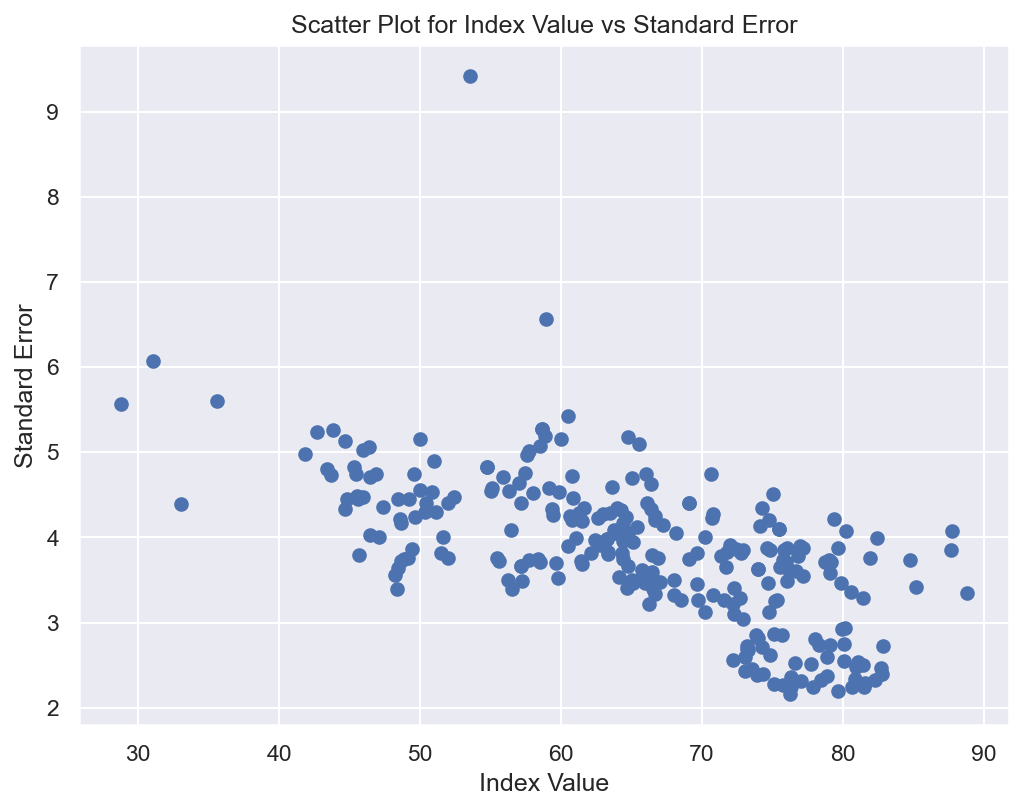

In [69]:
plt.scatter(x = df1["index_value"], y = df1["standard_error"])
plt.title("Scatter Plot for Index Value vs Standard Error")
plt.xlabel('Index Value')
plt.ylabel('Standard Error')

<AxesSubplot:xlabel='index_value', ylabel='standard_error'>

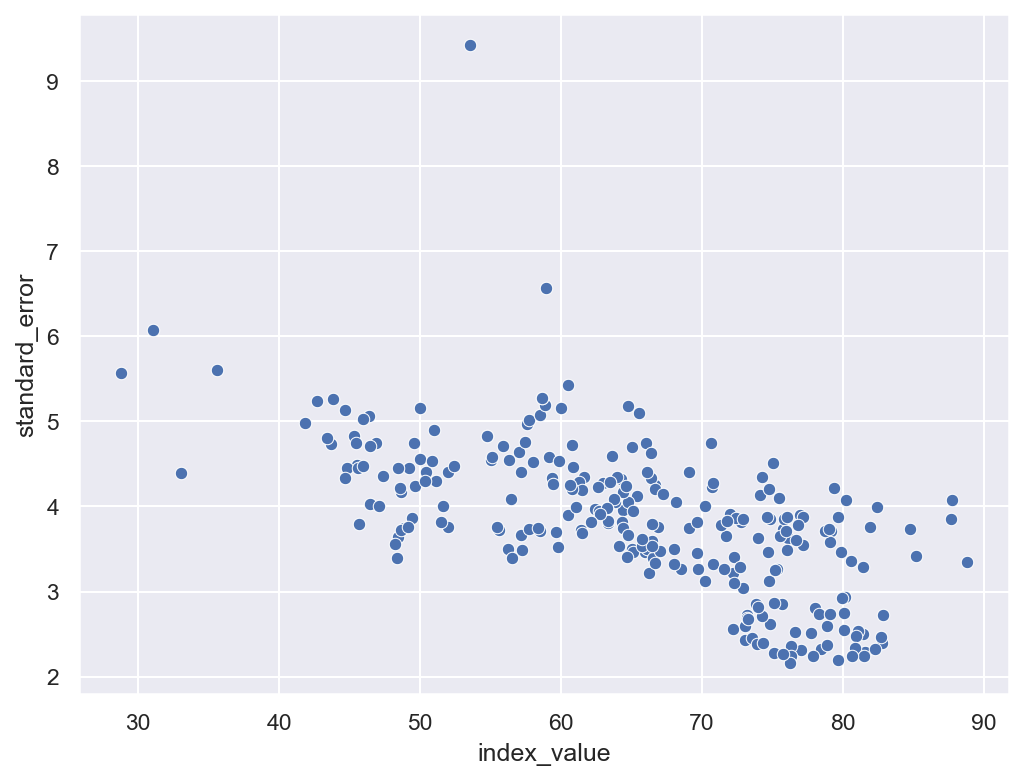

In [68]:
sns.scatterplot(x = df1["index_value"], y = df1["standard_error"], data = df1)

<AxesSubplot:>

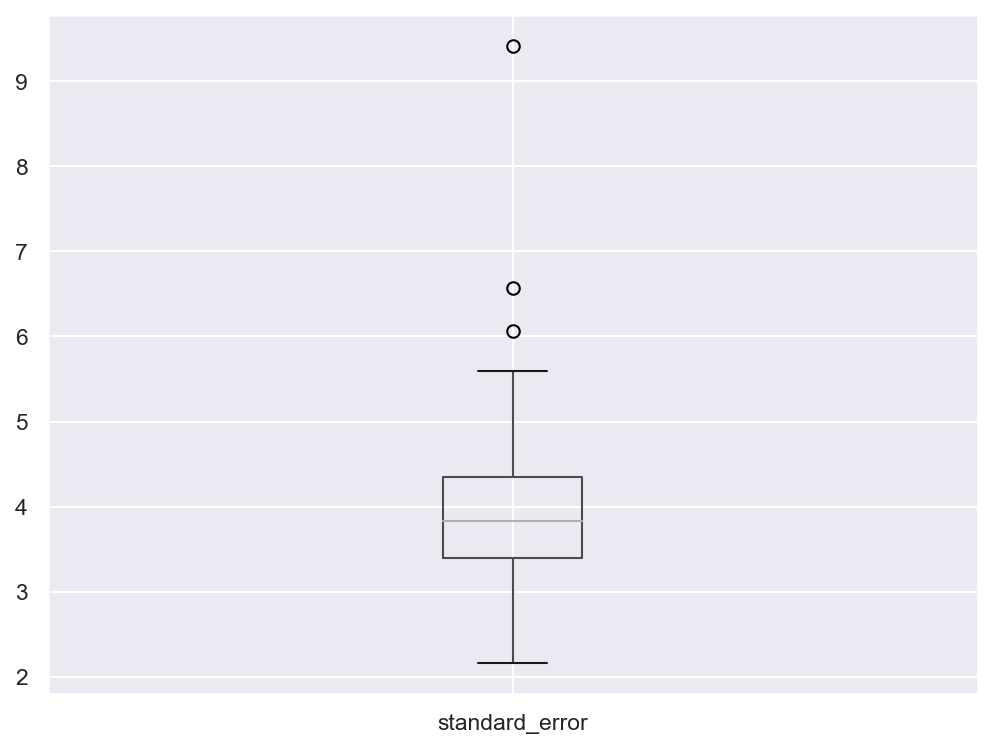

In [73]:
df1.boxplot(column = ['standard_error']) # to see if there is any outlier in the data

In [77]:
maximum = df1['standard_error'].quantile(0.95)

In [78]:
minimum = df1['standard_error'].quantile(0.05)

In [80]:
df1[df1['standard_error']>maximum]

,index_value,standard_error
7,42.70,5.24
8,43.82,5.26
13,50.00,5.16
239,60.00,5.16
241,58.89,5.19
242,58.62,5.28
243,58.93,6.57
244,53.57,9.42
245,31.03,6.07
246,28.79,5.57


In [81]:
df1[df1['standard_error']<minimum]

,index_value,standard_error
112,81.53,2.29
150,82.29,2.32
151,80.85,2.34
152,81.46,2.24
153,80.65,2.24
154,79.65,2.19
155,78.41,2.32
159,77.04,2.31
160,77.84,2.24
161,76.31,2.36


In [86]:
df1[(df1['standard_error']< maximum) & (df1['standard_error']>minimum)]

,index_value,standard_error
0,46.85,4.74
1,45.53,4.49
2,44.80,4.45
3,45.60,4.45
4,43.64,4.73
...,...,...
262,51.61,4.01
263,64.57,4.24
264,59.40,4.26
265,60.61,4.25


In [87]:
df1 # after the removal of the outliers

,index_value,standard_error
0,46.85,4.74
1,45.53,4.49
2,44.80,4.45
3,45.60,4.45
4,43.64,4.73
...,...,...
262,51.61,4.01
263,64.57,4.24
264,59.40,4.26
265,60.61,4.25


In [96]:
import statsmodels.api as sm

In [97]:
# definition of the predictor and outcome variable
x = df1[["index_value"]]
y = df1["standard_error"]

In [98]:
# define the constant 
x = sm.add_constant(x)

In [99]:
model = sm.OLS(y, x).fit()

In [100]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:         standard_error   R-squared:                       0.405
Model:                            OLS   Adj. R-squared:                  0.403
Method:                 Least Squares   F-statistic:                     180.2
Date:                Thu, 11 Nov 2021   Prob (F-statistic):           1.07e-31
Time:                        00:44:37   Log-Likelihood:                -273.56
No. Observations:                 267   AIC:                             551.1
Df Residuals:                     265   BIC:                             558.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           6.9012      0.232     29.802      

# from the result we can see that
standard_error = 6.9012 - 0.0469(index_value) 



# Create the Residual Plot

eval_env: 1


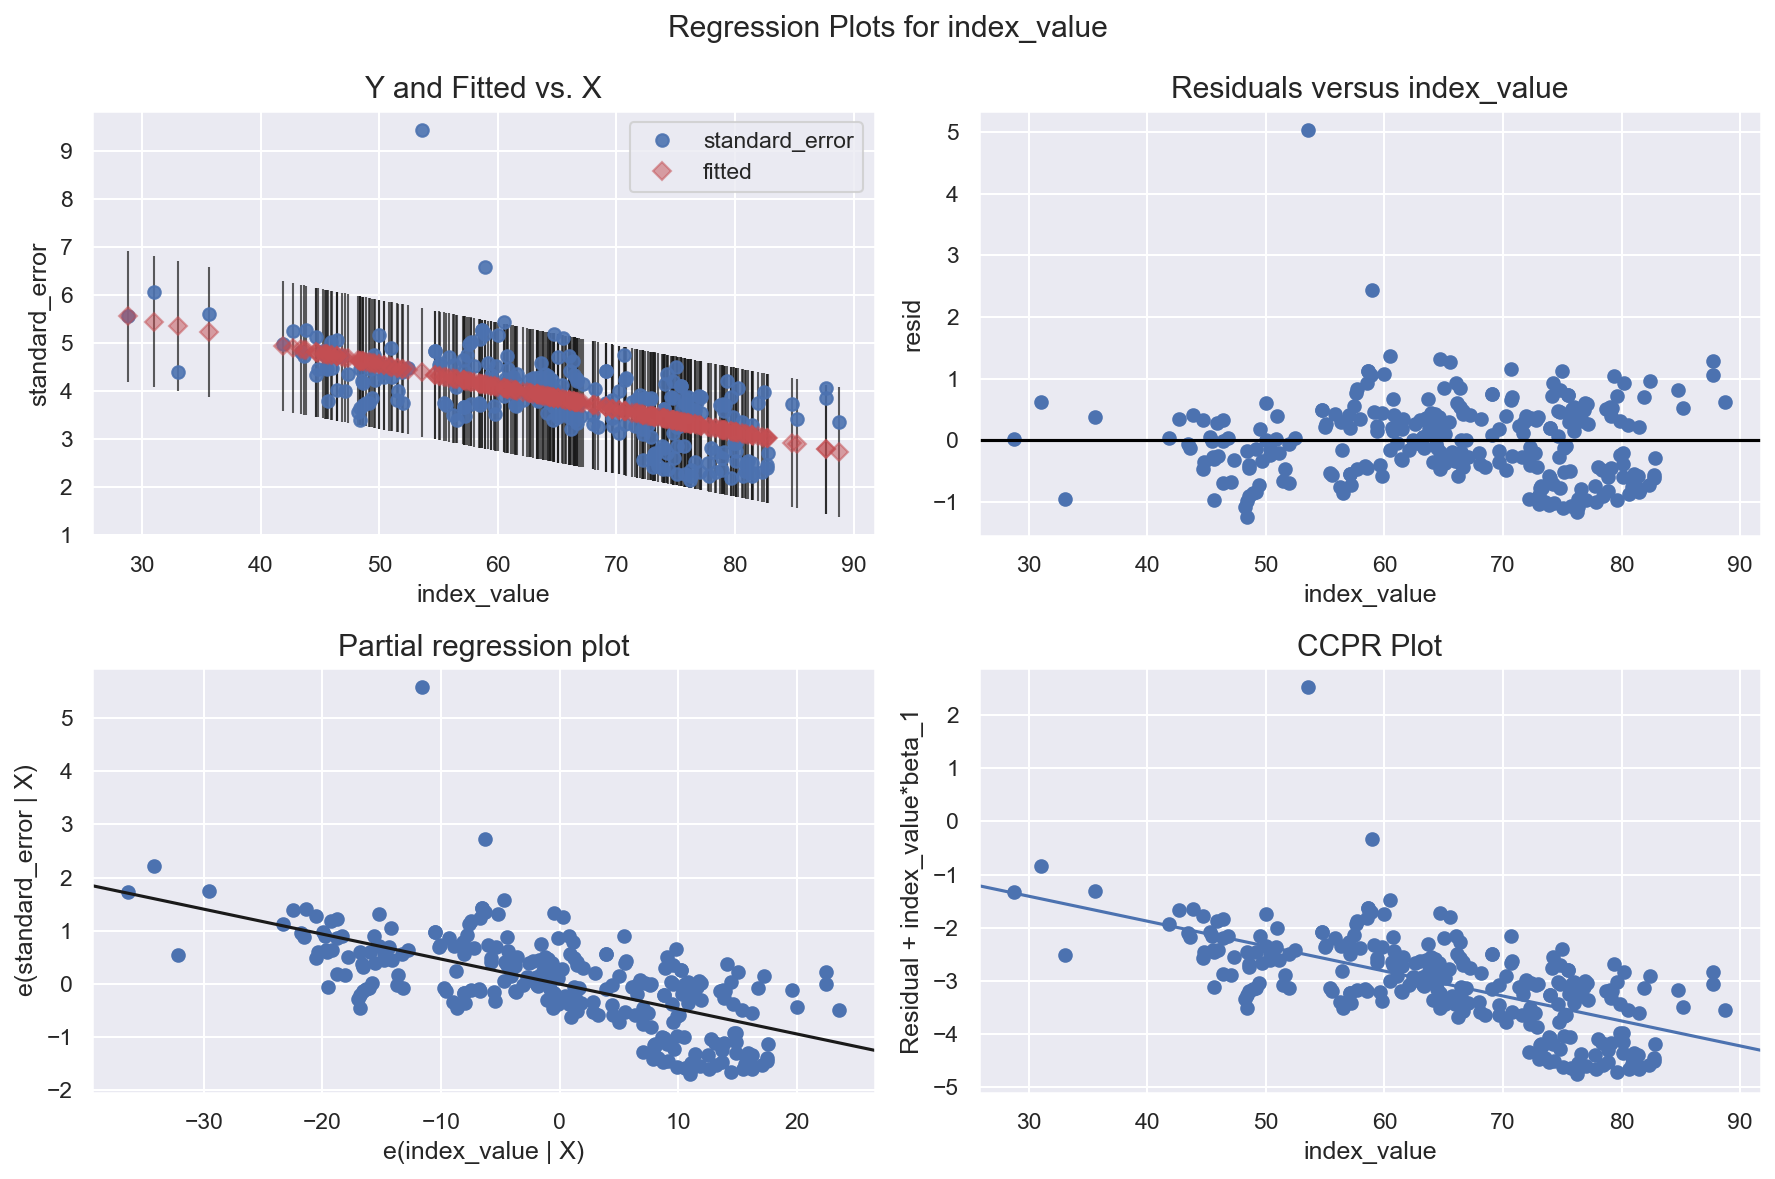

In [101]:
# define figure size
fig = plt.figure(figsize=(12,8))

#produce residual plots
fig = sm.graphics.plot_regress_exog(model, 'index_value', fig=fig)

# Q-Q Plot

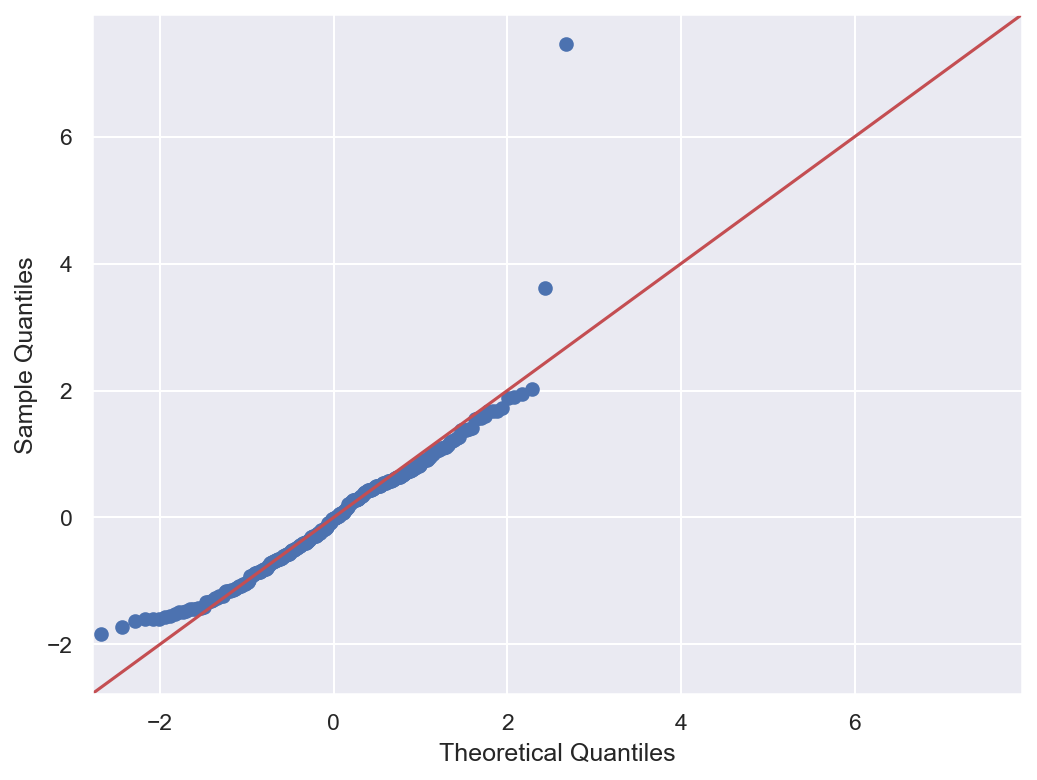

In [102]:
# define residuals
res = model.resid

# create Q-Q plot
fig = sm.qqplot(res, fit=True, line="45")
plt.show()